In [1]:
# import necessary packages
import matplotlib.pyplot as plt
import numpy as np

## Question (g)

In [3]:
# function to compute truncated P with given Z, rho and N
def P(Z, rho, N):
    PI = 1
    for n in range(1, N+1):
        PI = PI * (1-Z*rho**(2*n)) * (1-rho**(2*n)/Z)
    return (1-Z) * PI
# function to compute the complex potential
def G0(Z,a,rho, N):
    return -1j * np.log(np.abs(a)*P(Z/a,rho,N)/P(Z*np.conj(a),rho,N)) / (2*np.pi)

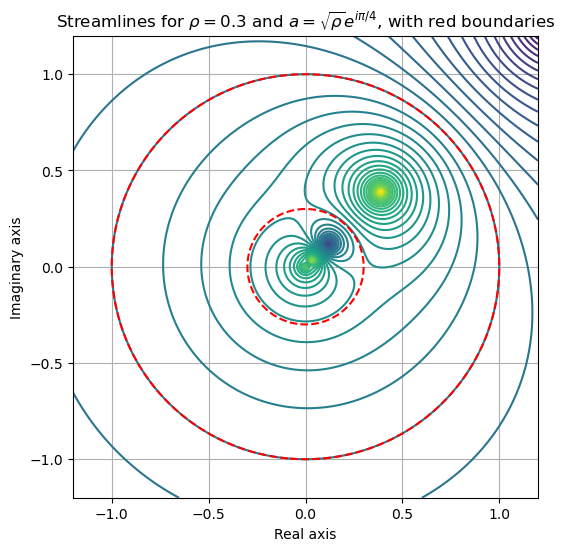

In [4]:
# z=x+iy
x = np.linspace(-1.2, 1.2, 200)
y = np.linspace(-1.2, 1.2, 200)
X, Y = np.meshgrid(x, y)
Z = X + 1j * Y  # Complex grid
# given parameters
rho = 0.3
a = np.sqrt(rho)*np.exp(1j*np.pi/4)
# size of truncation
N = 100
# compute streamlines
streamlines = G0(Z, a, rho, N).imag
# compute boundaries
boundary = X**2 + Y**2
# plot contours
plt.figure(figsize=(6,6))
plt.contour(X, Y, streamlines, levels=50)
plt.contour(X, Y, boundary, levels=[rho**2, 1], colors='red', linestyles='--')
plt.xlabel('Real axis')
plt.ylabel('Imaginary axis')
plt.title(r'Streamlines for $\rho=0.3$ and $a=\sqrt{\rho}e^{i\pi/4}$, with red boundaries')
plt.grid()
plt.savefig('streamlines.png')
plt.show()

## Question (h)(ii)

In [6]:
# function of inverse conformal mapping
def f_inverse(Z, lam):
    return (lam-Z)/(lam+Z)
# function of derivative of conformal mapping
def df(Z, lam):
    return -2*lam/((Z+1)**2)
# function to compute Hamiltonian function
def H(Z, lam, rho, N):
    a = f_inverse(Z, lam)
    PI = 1
    for n in range(1, N+1):
        PI = PI * (1-rho**(2*n))**2
    return np.log(P(np.abs(a)**2, rho, N) * np.abs(df(Z, lam)) / PI) / (4*np.pi)

C:\Users\Henley\AppData\Local\Temp\ipykernel_3100\3023064137.py:13: RuntimeWarning: invalid value encountered in log
  return np.log(P(np.abs(a)**2, rho, N) * np.abs(df(Z, lam)) / PI) / (4*np.pi)


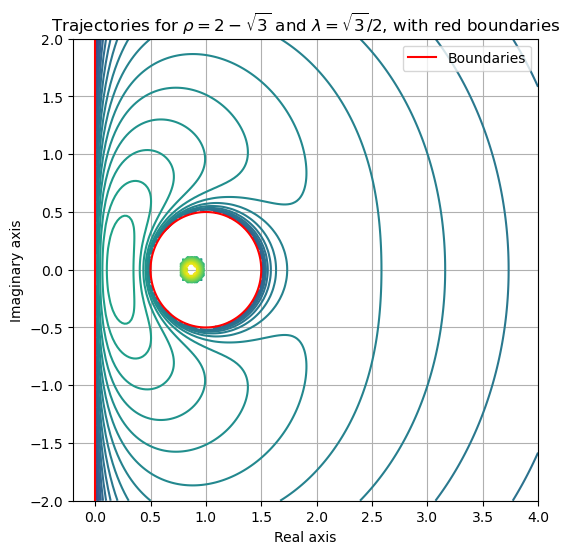

In [7]:
# z=x+iy
x = np.linspace(-0.2, 4, 200)
y = np.linspace(-2, 2, 200)
X, Y = np.meshgrid(x, y)
Z = X + 1j * Y  # Complex grid
# truncation number
N = 100
# parameters
lam = 0.5*np.sqrt(3)
rho = 2-np.sqrt(3)
# trajectories
trajectories = H(Z, lam, rho, N)
# circular coundary
circle = (X-1)**2 + Y**2
# plot the trajectorties
plt.figure(figsize=(6,6))
plt.contour(X, Y, trajectories, levels=50)
plt.contour(X, Y, circle, levels=[0.25], colors='red')
plt.axvline(0, color='red', label='Boundaries')
plt.xlabel('Real axis')
plt.ylabel('Imaginary axis')
plt.title(r'Trajectories for $\rho=2-\sqrt{3}$ and $\lambda=\sqrt{3}/2$, with red boundaries')
plt.legend()
plt.grid()
plt.savefig('trajectories.png')
plt.show()

## Question (h)(iii)

In [9]:
# function to compute K
def K(Z,rho,N):
    s = 0
    for n in range(1, N+1):
        s += Z/(Z-rho**(-2*n)) + (rho**(2*n))/(Z-rho**(2*n))
    return Z/(Z-1) + s
# function to compute derivative of complex potential with cylinder
def dW(z, z_a, rho, lam, N):
    Z = f_inverse(z, lam)
    a = f_inverse(z_a, lam)
    return 1j * (K(Z/a, rho, N) - K(Z*np.conj(a), rho, N)) * lam / (np.pi*Z * (z+lam)**2)
# function to compute derivative of complex potential without cylinder
def dW_nc(z, z_a):
    return -1j * z_a / (np.pi * (z**2 - z_a**2))

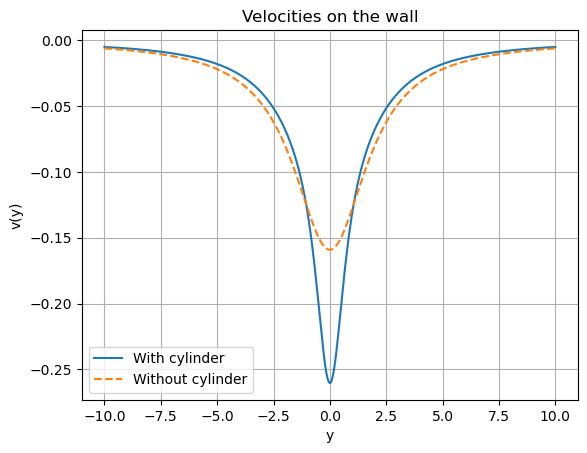

In [10]:
# focus on the imaginary line
y = np.linspace(-10,10,1000)
z = 1j*y
# position of vortex
z_a = 2
#number of trunctions
N=100
# compute velocities
v_y = -dW(z, z_a, rho, lam, N).imag
v_y_nc = -dW_nc(z, z_a).imag
# plot volecities
plt.plot(y, v_y, label='With cylinder')
plt.plot(y, v_y_nc, '--', label='Without cylinder')
plt.xlabel('y')
plt.ylabel('v(y)')
plt.title('Velocities on the wall')
plt.legend()
plt.grid()
plt.savefig('velocity.png')
plt.show()
